<a href="https://colab.research.google.com/github/034adarsh/Stock-Price-Prediction-Using-LSTM/blob/main/LSTM_Improved_model(diff_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

---



In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [2]:


START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [3]:
data = load_data('TCS.NS')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,377.399994,379.450012,374.524994,375.825012,284.035736,1963682
1,2010-01-05,377.500000,379.774994,373.274994,375.924988,284.111237,2014488
2,2010-01-06,375.924988,376.100006,366.500000,367.424988,277.687317,3349176
3,2010-01-07,367.750000,369.700012,355.500000,357.200012,269.959595,6474892
4,2010-01-08,358.000000,359.250000,348.250000,349.899994,264.442566,6048178


In [4]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,377.399994,379.450012,374.524994,375.825012,1963682
1,377.500000,379.774994,373.274994,375.924988,2014488
2,375.924988,376.100006,366.500000,367.424988,3349176
3,367.750000,369.700012,355.500000,357.200012,6474892
4,358.000000,359.250000,348.250000,349.899994,6048178


Visualizing Closing Price

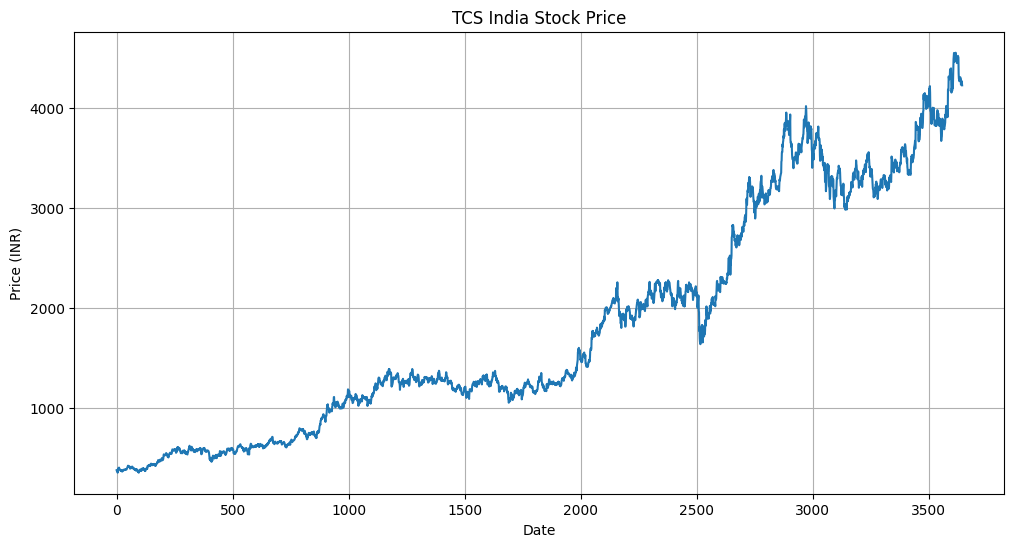

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [6]:
df

,Open,High,Low,Close,Volume
0,377.399994,379.450012,374.524994,375.825012,1963682
1,377.500000,379.774994,373.274994,375.924988,2014488
2,375.924988,376.100006,366.500000,367.424988,3349176
3,367.750000,369.700012,355.500000,357.200012,6474892
4,358.000000,359.250000,348.250000,349.899994,6048178
...,...,...,...,...,...
3640,4225.000000,4298.000000,4224.049805,4252.250000,2965463
3641,4273.899902,4297.250000,4229.399902,4272.850098,1472619
3642,4272.600098,4279.399902,4203.950195,4253.250000,1541867
3643,4260.000000,4295.000000,4246.700195,4252.950195,1082504


# Plotting moving averages of 100 day

---



In [7]:
ma100 = df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3640    4152.951492
3641    4156.201992
3642    4159.722493
3643    4163.447996
3644    4166.712495
Name: Close, Length: 3645, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

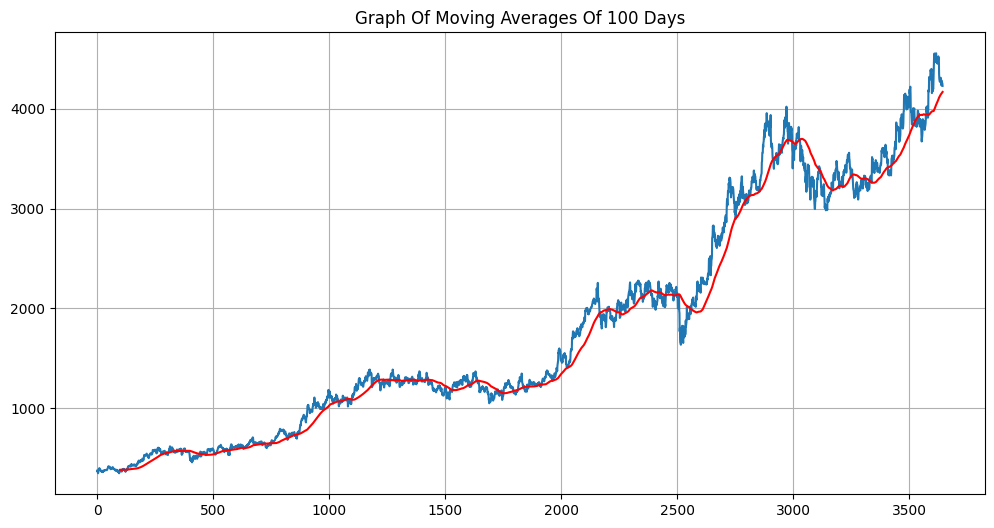

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [9]:
ma200 = df.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3640    4039.885001
3641    4042.888751
3642    4046.187251
3643    4049.115752
3644    4050.947751
Name: Close, Length: 3645, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

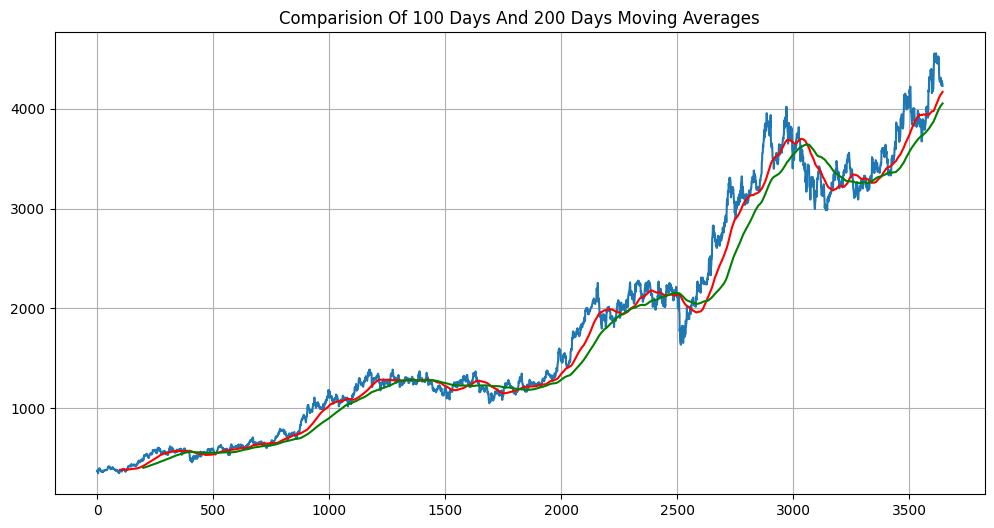

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [11]:
df.shape

(3645, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [12]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2551, 7)
(1094, 7)


In [13]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,377.399994,379.450012,374.524994,375.825012,284.035736,1963682
1,2010-01-05,377.500000,379.774994,373.274994,375.924988,284.111237,2014488
2,2010-01-06,375.924988,376.100006,366.500000,367.424988,277.687317,3349176
3,2010-01-07,367.750000,369.700012,355.500000,357.200012,269.959595,6474892
4,2010-01-08,358.000000,359.250000,348.250000,349.899994,264.442566,6048178


In [14]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2551,2020-05-14,1910.0,1923.099976,1891.099976,1902.349976,1758.702515,2263146
2552,2020-05-15,1916.0,1917.400024,1865.199951,1892.900024,1749.966187,3173682
2553,2020-05-18,1907.0,1952.949951,1872.099976,1945.599976,1798.686646,3727694
2554,2020-05-19,1903.0,1966.449951,1903.000000,1948.650024,1801.506348,3198693
2555,2020-05-20,1950.0,1962.900024,1931.699951,1953.599976,1806.082275,2778505


# Using MinMax scaler for normalization of the dataset

---



In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [17]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.01351019],
       [0.01356204],
       [0.00915373],
       ...,
       [0.82229315],
       [0.8296576 ],
       [0.82973541]])

In [18]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [19]:
x_train.shape

(2451, 100, 1)

# ML Model (LSTM)

---



In [20]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [21]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/Users/shahryaradil/miniconda3/envs/fyp/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [23]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step - loss: 0.0878 - mean_absolute_error: 0.2145
Epoch 2/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 114ms/step - loss: 0.0098 - mean_absolute_error: 0.0698
Epoch 3/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - loss: 0.0080 - mean_absolute_error: 0.0640
Epoch 4/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 116ms/step - loss: 0.0075 - mean_absolute_error: 0.0601
Epoch 5/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 116ms/step - loss: 0.0062 - mean_absolute_error: 0.0562
Epoch 6/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step - loss: 0.0064 - mean_absolute_error: 0.0558
Epoch 7/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - loss: 0.0060 - mean_absolute_error: 0.0530
Epoch 8/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - loss: 0.0061 - mean_absolute_error: 0.0529
Epoch 9/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - loss: 0.0052 - mean_absolute_error: 0.0497
Epoch 10/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - loss: 0.0054 - mean_absolute_error: 0.0505
Epoch 11/100
77/77

In [24]:
model.save('keras_model.h5')

In [25]:
test_close.shape

(1094, 1)

In [26]:
past_100_days = pd.DataFrame(train_close[-100:])

In [27]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [28]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [29]:
final_df.head()

,0
0,2126.750000
1,2164.949951
2,2167.750000
3,2229.050049
4,2222.899902


In [30]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.16809489],
       [0.18118872],
       [0.1821485 ],
       ...,
       [0.89699733],
       [0.89689456],
       [0.88813666]])

In [31]:
input_data.shape

(1194, 1)

# Testing the model

---



In [32]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [33]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1094, 100, 1)
(1094,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [34]:
# Making predictions

y_pred = model.predict(x_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step


In [35]:
y_pred.shape

(1094, 1)

In [36]:
y_test

array([0.09117707, 0.08793791, 0.10600192, ..., 0.89699733, 0.89689456,
       0.88813666])

In [37]:
y_pred

array([[0.16127196],
       [0.16452423],
       [0.1674824 ],
       ...,
       [0.86101043],
       [0.8593607 ],
       [0.85781157]], dtype=float32)

In [38]:
scaler.scale_

array([0.00034277])

In [39]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

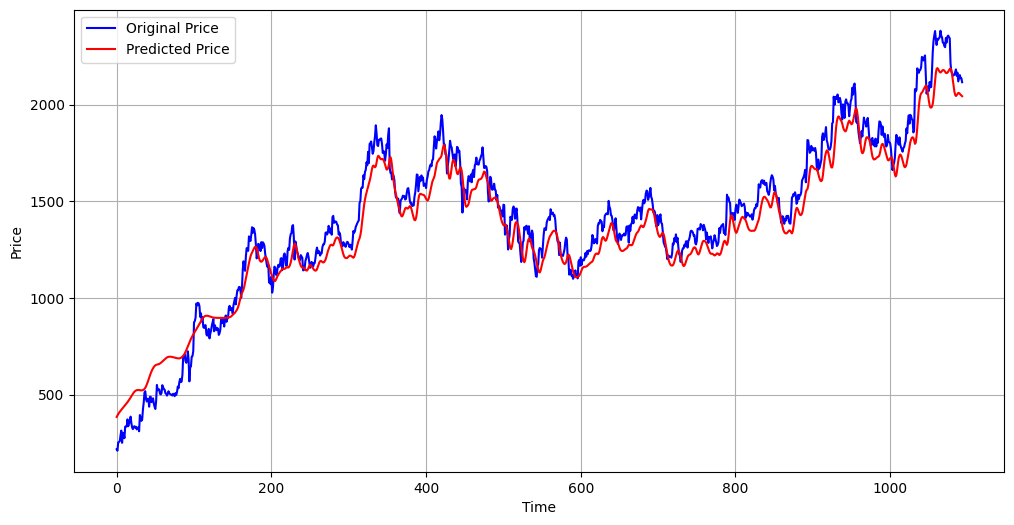

In [40]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [41]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 6.30%


Calculation of R2 score

In [43]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9413217459896754


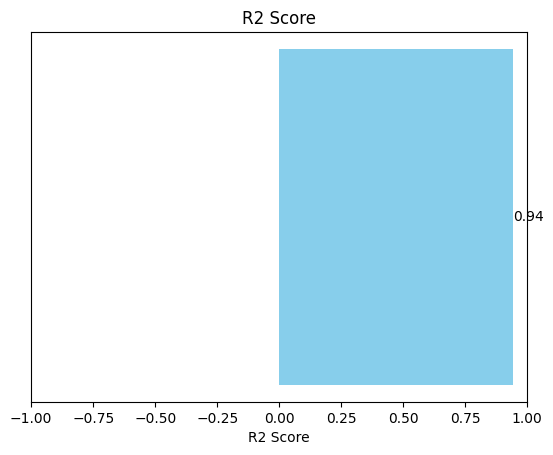

In [44]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

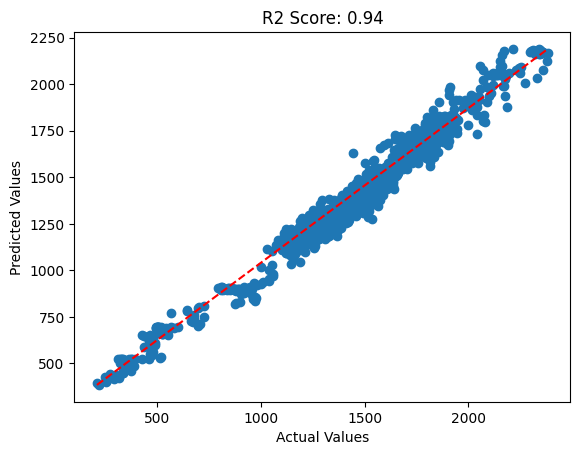

In [45]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()